### 导入包

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 数据加载

In [2]:
annData = sc.read_h5ad("dataset1.h5ad")

In [3]:
annData.var_names_make_unique()
annData.obs_names_make_unique()

读取完数据后首先进行对数据结构annData进行初步了解以及数据的预览：

[![2.jpg](https://i.postimg.cc/htVKHWVY/2.jpg)](https://postimg.cc/0z2gw4WG)

1. `.var`包含基因元数据，即基因的注释信息：横坐标是每个基因名称，纵坐标是每个基因的注释信息

In [4]:
print(annData.var)

Empty DataFrame
Columns: []
Index: [AL627309.1, AL627309.5, AL627309.4, AP006222.2, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, GABRD, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, AL590822.3, MORN1, AL513477.2, RER1, PEX10, PLCH2, AL139246.1, PANK4, HES5, AL139246.5, TNFRSF14-AS1, TNFRSF14, AL139246.3, PRXL2B, MMEL1, TTC34, AL592464.3, PRDM16, ...]

[29095 rows x 0 columns]


In [5]:
print(annData.var.index)
#返回基因，数据类型是object

Index(['AL627309.1', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL669831.2',
       'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C',
       ...
       'MAFIP', 'AC011043.1', 'AL354822.1', 'AL592183.1', 'AC240274.1',
       'AC004556.3', 'AC233755.2', 'AC233755.1', 'AC007325.1', 'AC007325.4'],
      dtype='object', name='genes', length=29095)


In [6]:
print(annData.var_names.to_list())
#返回基因，数据类型是list

['AL627309.1', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL669831.2', 'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.6', 'AL645608.2', 'LINC02593', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'AL645608.7', 'HES4', 'ISG15', 'AL645608.1', 'AGRN', 'C1orf159', 'AL390719.3', 'LINC01342', 'AL390719.2', 'TTLL10-AS1', 'TTLL10', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'B3GALT6', 'C1QTNF12', 'AL162741.1', 'UBE2J2', 'LINC01786', 'SCNN1D', 'ACAP3', 'PUSL1', 'INTS11', 'AL139287.1', 'CPTP', 'TAS1R3', 'DVL1', 'MXRA8', 'AURKAIP1', 'CCNL2', 'MRPL20-AS1', 'MRPL20', 'AL391244.2', 'ANKRD65', 'LINC01770', 'VWA1', 'ATAD3C', 'ATAD3B', 'ATAD3A', 'TMEM240', 'SSU72', 'AL645728.1', 'FNDC10', 'AL691432.4', 'AL691432.2', 'MIB2', 'MMP23B', 'CDK11B', 'FO704657.1', 'SLC35E2B', 'CDK11A', 'SLC35E2A', 'NADK', 'GNB1', 'AL109917.1', 'CALML6', 'TMEM52', 'CFAP74', 'GABRD', 'PRKCZ', 'AL590822.2', 'PRKCZ-AS1', 'FAAP20', 'AL590822.1', 'SKI', 'AL590822.3', 'MORN1', 'AL513477.2', 'RER1', 'PEX10', 'PLCH2', 'AL139246.1',

In [7]:
#获取数据内容
annData.var.head()

""
genes
AL627309.1
AL627309.5
AL627309.4
AP006222.2
AL669831.2


2. `.X`是基因-细胞矩阵，是一个稀疏矩阵。横坐标是每个基因的名称，纵坐标是每个细胞的名称

In [8]:
print(annData.X)

  (0, 19)	1.0
  (0, 22)	1.0
  (0, 70)	1.0
  (0, 85)	1.0
  (0, 93)	1.0
  (0, 124)	3.0
  (0, 126)	5.0
  (0, 167)	1.0
  (0, 180)	2.0
  (0, 192)	2.0
  (0, 213)	1.0
  (0, 238)	1.0
  (0, 248)	1.0
  (0, 275)	1.0
  (0, 290)	1.0
  (0, 299)	2.0
  (0, 324)	1.0
  (0, 330)	1.0
  (0, 331)	2.0
  (0, 349)	1.0
  (0, 354)	1.0
  (0, 357)	1.0
  (0, 360)	1.0
  (0, 388)	1.0
  (0, 393)	1.0
  :	:
  (9630, 28882)	1.0
  (9630, 28917)	2.0
  (9630, 28982)	1.0
  (9630, 28987)	1.0
  (9630, 28988)	2.0
  (9630, 28992)	1.0
  (9630, 28999)	1.0
  (9630, 29004)	1.0
  (9630, 29007)	20.0
  (9630, 29009)	2.0
  (9630, 29023)	1.0
  (9630, 29041)	1.0
  (9630, 29070)	17.0
  (9630, 29071)	40.0
  (9630, 29072)	26.0
  (9630, 29073)	50.0
  (9630, 29074)	4.0
  (9630, 29075)	59.0
  (9630, 29076)	35.0
  (9630, 29077)	37.0
  (9630, 29078)	1.0
  (9630, 29079)	28.0
  (9630, 29080)	9.0
  (9630, 29081)	1.0
  (9630, 29082)	29.0


3. `.obs`是细胞的注释信息等。横坐标是不同的细胞注释结果，纵坐标是细胞名称。

In [9]:
annData.obs.head()

""
cells
AAACAGCCAATCCCTT-1
AAACAGCCAATGCGCT-1
AAACAGCCACCAACCG-1
AAACAGCCAGGATAAC-1
AAACAGCCAGTTTACG-1


In [10]:
print(annData.obs_names)
#返回细胞ID，数据类型是Object

Index(['AAACAGCCAATCCCTT-1', 'AAACAGCCAATGCGCT-1', 'AAACAGCCACCAACCG-1',
       'AAACAGCCAGGATAAC-1', 'AAACAGCCAGTTTACG-1', 'AAACAGCCATCCAGGT-1',
       'AAACATGCAAGGTCCT-1', 'AAACATGCACCGGCTA-1', 'AAACATGCACTTGTTC-1',
       'AAACATGCAGCAAGTG-1',
       ...
       'TTTGTGTTCGATAACC-1', 'TTTGTGTTCGGGACCT-1', 'TTTGTGTTCGTCAAGT-1',
       'TTTGTGTTCTCCATAT-1', 'TTTGTTGGTCAGGAAG-1', 'TTTGTTGGTGACATGC-1',
       'TTTGTTGGTGTTAAAC-1', 'TTTGTTGGTTAGGATT-1', 'TTTGTTGGTTGGTTAG-1',
       'TTTGTTGGTTTGCAGA-1'],
      dtype='object', name='cells', length=9631)


4. `.obsm`是一个字典，用于存储观测的低维表达形式。

In [11]:
print(annData.obsm_keys)

<bound method AnnData.obsm_keys of AnnData object with n_obs × n_vars = 9631 × 29095>


5. 最后是`.uns`，这是一个字典的结构，存储的是一些计算结果，此时输出为OrderedDict()表示其中不包含任何键值对。

In [12]:
print(annData.uns)

OrderedDict()


对其中的每一个部分有大概的印象后，将其转化为dataFrame格式输出，帮助记忆：

In [13]:
print(annData.to_df())

genes               AL627309.1  AL627309.5  AL627309.4  AP006222.2  \
cells                                                                
AAACAGCCAATCCCTT-1         0.0         0.0         0.0         0.0   
AAACAGCCAATGCGCT-1         0.0         0.0         0.0         0.0   
AAACAGCCACCAACCG-1         0.0         0.0         0.0         0.0   
AAACAGCCAGGATAAC-1         0.0         0.0         0.0         0.0   
AAACAGCCAGTTTACG-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGTTGGTGACATGC-1         0.0         0.0         0.0         0.0   
TTTGTTGGTGTTAAAC-1         0.0         0.0         0.0         0.0   
TTTGTTGGTTAGGATT-1         0.0         0.0         0.0         0.0   
TTTGTTGGTTGGTTAG-1         0.0         0.0         0.0         0.0   
TTTGTTGGTTTGCAGA-1         0.0         0.0         0.0         0.0   

genes               AL669831.2  LINC01409  FAM87B  LINC01128  LINC00115  \
cells         

从上述输出可以看出，这个数据集总共有9631个细胞，29095个基因。

输出annData相关信息：

In [14]:
annData

AnnData object with n_obs × n_vars = 9631 × 29095

### 数据过滤

首先查看细胞表达基因数量

In [15]:
#存储每个细胞表达了多少基因
gene_counts_per_cell=annData.X.sum(axis=1)

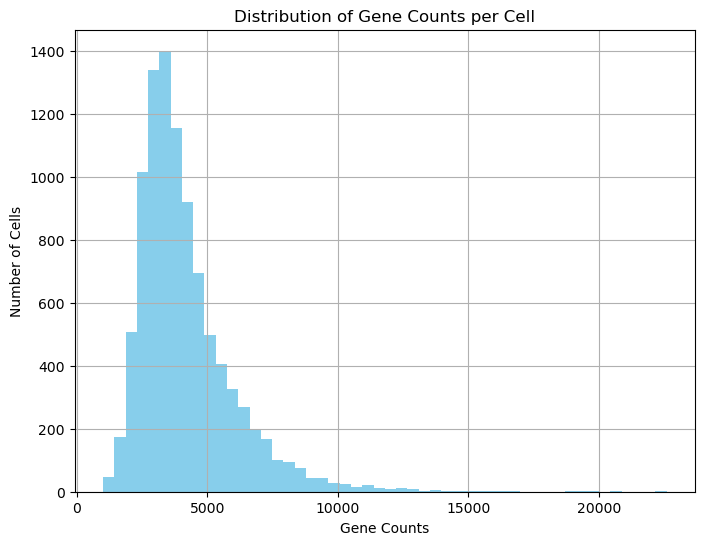

In [16]:
#可视化数据
plt.figure(figsize=(8, 6))
plt.hist(gene_counts_per_cell, bins=50, color='skyblue')
plt.xlabel('Gene Counts')
plt.ylabel('Number of Cells')
plt.title('Distribution of Gene Counts per Cell')
plt.grid(True)
plt.show()

可以看到，大部分细胞表达了3000个左右基因

e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

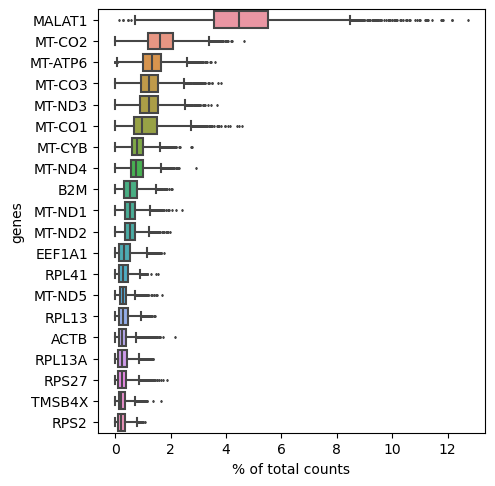

In [17]:
sc.pl.highest_expr_genes(annData, n_top=20)
#展示在所有的细胞当中表达占比最高的20个基因

其中表达占比最高的基因是Malat1

接下来可视化每个基因表达的细胞数量：

In [18]:
# 计算每个基因的表达细胞数量
cells_expressed_per_gene = annData.X.getnnz(axis=0)

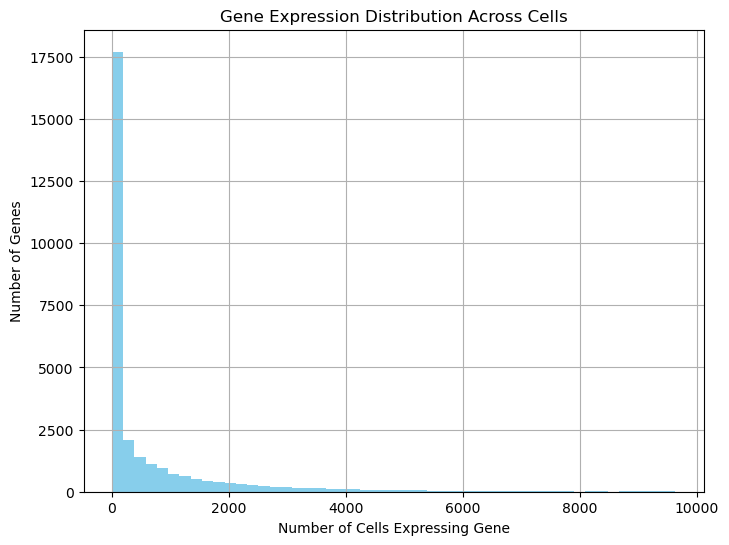

In [19]:
# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(cells_expressed_per_gene, bins=50, color='skyblue')
plt.xlabel('Number of Cells Expressing Gene')
plt.ylabel('Number of Genes')
plt.title('Gene Expression Distribution Across Cells')
plt.grid(True)
plt.show()

如图可以发现，大部分基因由500左右个细胞表达，最多的被8000个基因表达。

进行初步筛选：去除表达基因200以下的细胞和在3个细胞以下表达的基因：

In [20]:
sc.pp.filter_genes(annData,min_cells=3)
#去除在3个细胞以下表达的基因

In [21]:
annData

AnnData object with n_obs × n_vars = 9631 × 25523
    var: 'n_cells'

可以看到，在基础过滤之后，细胞数量为9631，基因数量被过滤至了25523；说明过滤有一定效果。

### 数据归一化
- 目的：
  - 使数据接近正态分布
  - 确保数据的尺度一致性
- 方法：
  - 移位对数变换：有利于稳定方差，以利于后续降维和差异表达基因的识别
  - 皮尔森近似残差：保留生物学差异，并鉴定稀有细胞类型

In [22]:
#将基因计数（X）复制到了counts的层中
annData.layers['counts']=annData.X.copy()

#### 基于delta的移位对数

In [23]:
#inplace=False表示此操作不会更改原始的AnnData对象，而是返回一个新的对象
scales_counts = sc.pp.normalize_total(annData, target_sum=None, inplace=False)
#对经过归一化处理后的数据进行log1p转换，并将结果存储在AnnData对象的layers中的"log1p_norm"层
annData.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

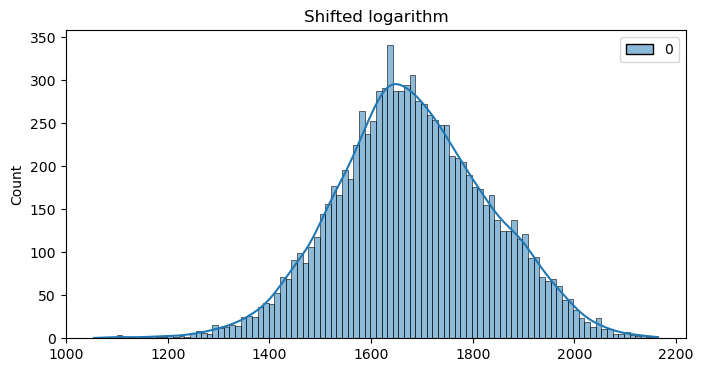

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
p1 = sns.histplot(annData.layers["log1p_norm"].sum(1), bins=100, kde=True, ax=axes)
axes.set_title("Shifted logarithm")
plt.show()

In [25]:
annData.layers["log1p_norm"].max()

7.1702733

从图中可以看出，该方法使结果倾向于正态分布

#### 皮尔森残差

In [26]:
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(annData, inplace=False)
#copy默认为true
annData.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

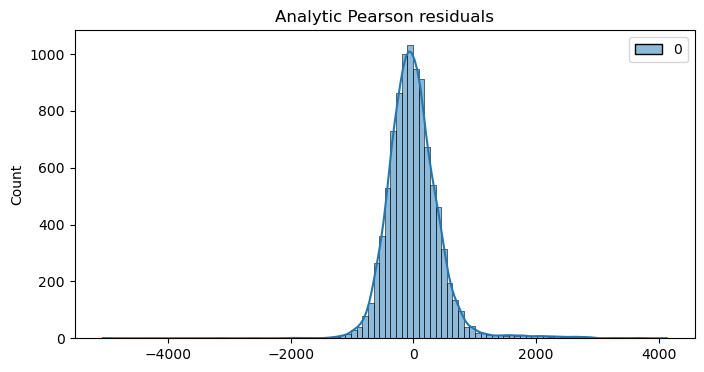

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
p2 = sns.histplot(
    annData.layers["analytic_pearson_residuals"].sum(1), bins=100, kde=True, ax=axes
)
axes.set_title("Analytic Pearson residuals")
plt.show()

In [28]:
annData.layers["analytic_pearson_residuals"].max()

98.13766

归一化效果较好，同时对数据进行了缩放，将数据范围缩放到了-1000到1000之间

In [29]:
annData

AnnData object with n_obs × n_vars = 9631 × 25523
    var: 'n_cells'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals'

### 特征基因选择

从上述分析可以看出，一个细胞表达的基因大概是1000个左右，其中包含了一些不太具有实际意义的基因
- 大多数包含0计数
- 许多细胞中普遍出现

以上两种细胞在实际的分析中将不具有实际意义，所以现在的任务是计算出高可变基因（特征基因），排除那些不具有分析意义的基因，避免影响后续的聚类

#### 基于基因归一化方差

In [30]:
annData_var_num=sc.pp.highly_variable_genes(
    annData, 
    #指定用于识别高度可变基因的算法或方法的类型或名称，
    flavor="seurat_v3",
    #用于指定所用的数据层，在layer上分析，基于原始数据
    layer='counts',
    #表示要识别作为高度可变基因的前n个基因
    n_top_genes=2000,
    #指定是否仅在数据子集上计算高度可变性
    subset=False,
    inplace=False,
)
#将结果存储到var层中highly_variable_var部分
annData.var["highly_variable_var"]=annData_var_num['highly_variable']

In [31]:
annData_var_num['highly_variable'].value_counts()

highly_variable
False    23523
True      2000
Name: count, dtype: int64

In [32]:
annData_var_num

,means,variances,highly_variable_rank,variances_norm,highly_variable
genes,,,,,
AL627309.1,0.007268,0.008462,NaN,0.971645,False
AL627309.5,0.045893,0.050853,NaN,0.888462,False
AL627309.4,0.004569,0.004756,NaN,0.890369,False
AL669831.2,0.001038,0.001037,NaN,0.934133,False
LINC01409,0.056484,0.067006,NaN,0.948521,False
...,...,...,...,...,...
AL592183.1,0.203510,0.268029,NaN,0.956049,False
AC240274.1,0.024400,0.025677,NaN,0.846022,False
AC004556.3,0.033226,0.035448,NaN,0.855381,False


#### 基于基因皮尔森近似残差

In [33]:
annData_pearson_num=sc.experimental.pp.highly_variable_genes(
    annData, 
    #指定用于识别高度可变基因的算法或方法的类型或名称，
    flavor="pearson_residuals",
    #用于指定所用的数据层
    layer='counts',
    #表示要识别作为高度可变基因的前n个基因
    n_top_genes=2000,
    #指定是否仅在数据子集上计算高度可变性
    subset=False,
    inplace=False,
)
#将结果存储到var层中highly_variable_pearson部分
annData.var["highly_variable_pearson"]=annData_pearson_num['highly_variable']

In [34]:
annData_pearson_num['highly_variable'].value_counts()

highly_variable
False    23523
True      2000
Name: count, dtype: int64

In [35]:
annData_pearson_num

,means,variances,residual_variances,highly_variable_rank,highly_variable
genes,,,,,
AL627309.1,0.007268,0.008462,1.128491,NaN,False
AL627309.5,0.045893,0.050853,0.983263,NaN,False
AL627309.4,0.004569,0.004756,0.965878,NaN,False
AL669831.2,0.001038,0.001037,1.079394,NaN,False
LINC01409,0.056484,0.067006,1.160983,NaN,False
...,...,...,...,...,...
AL592183.1,0.203510,0.268029,1.392257,NaN,False
AC240274.1,0.024400,0.025677,1.101975,NaN,False
AC004556.3,0.033226,0.035448,1.043137,NaN,False


In [36]:
annData

AnnData object with n_obs × n_vars = 9631 × 25523
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals'

### 数据降维

上一步中，已经通过特征基因的选择对数据的维度进行了初步降低，将其中比较能代表数据（或者说区别数据）的那一部分特征筛选出来

同时已知，高纬度状态下，数据中会包含更多的噪声和冗余。

所以，接下来，我们要通过使用降维算法进一步降低数据的维度，以便降低数据复杂性和进行可视化。

#### PCA线性降维
PCA是主成分分析法，它通过对原始数据集进行正交变换，创建一组新的无关变量，即主成分（PCs）

PCs是原始数据集中特征的线性组合，并按照方差的递减顺序进行排名以定义变换，通常第一主成分的方差最大。

In [37]:
annData.var.head()

,n_cells,highly_variable_var,highly_variable_pearson
genes,,,
AL627309.1,65,False,False
AL627309.5,410,False,False
AL627309.4,43,False,False
AL669831.2,10,False,False
LINC01409,486,False,False


In [38]:
#将原始数据存放在.raw中，注意.raw是一个只读属性，不可以在其上做更改
annData.raw=annData.copy()

In [39]:
annData

AnnData object with n_obs × n_vars = 9631 × 25523
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals'

In [40]:
annData.shape

(9631, 25523)

获取只有高变基因的数据集

In [41]:
#采用皮尔森残差的结果
#保留 annData.var 中 "highly_variable_pearson" 列值为 True 的列（特征）
#并将选择后的数据重新赋值给 annData，覆盖掉原始数据。
annData=annData[:,annData.var["highly_variable_pearson"]==True]
annData.shape

(9631, 2000)

In [42]:
#手动创建一个变量，这个变量就可以进行更改然后再存回layer层中
annData_scaled=annData.copy()

In [43]:
sc.pp.scale(annData_scaled,max_value=10)

In [44]:
#scanpy中scale后的值默认取代.X，所以此时将X放入layers中，不改变原数据
annData.layers["scaled"]=annData_scaled.X

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12868\129304177.py:2: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  annData.layers["scaled"]=annData_scaled.X


In [45]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'

接下来基于scaled层进行pca运算

In [46]:
copy_data1=annData.copy()
copy_data1.X=annData.layers["scaled"]
#copy_data1 = sc.AnnData(X=annData.layers["scaled"])

In [47]:
#执行主成分分析
#svd_solver设定为奇异值分解的求解器
#n_comps为计算的主成分数量
sc.pp.pca(copy_data1, svd_solver='arpack', n_comps=50)

In [48]:
copy_data1

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


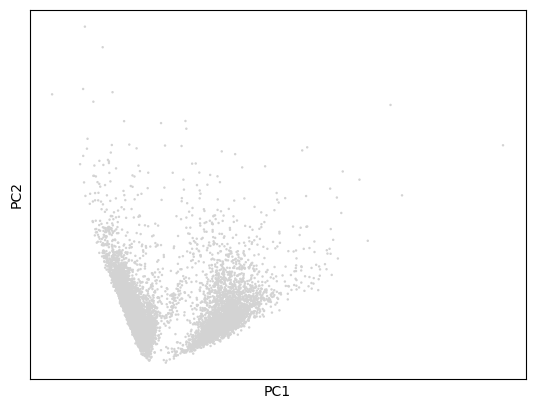

In [49]:
#由于最后的主成分仍然有50，依旧是高维数据，可视化后数据不直观
sc.pl.pca(copy_data1)
#这个应该是可以加颜色的，但是我一加就报错，所以我严重怀疑我电脑有问题
#（是的我运行不出来就是电脑的错）
# 我讨厌他
# 
# sc.pl.pca(copy_data1,color='X_pca')

In [50]:
#将结果存入原数据中
annData.obsm["scaled|X_pca"]=copy_data1.obsm["X_pca"]

In [51]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    obsm: 'scaled|X_pca'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'

使用原始数据进行pca主成分分析

In [52]:
copy_data2=annData.copy()
copy_data2.X=annData.layers["counts"]
#copy_data2 = sc.AnnData(X=annData.layers["counts"])

In [53]:
sc.pp.pca(copy_data2, svd_solver='arpack', n_comps=50)

In [54]:
copy_data2

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'pca'
    obsm: 'scaled|X_pca', 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


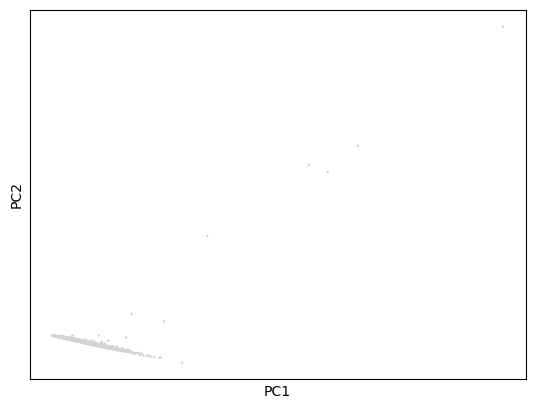

In [55]:
sc.pl.pca(copy_data2)
# 这个同上，大概是我电脑的问题
# 如果实在不行的话你再打回来我改改吧
# T^T T^T T^T

In [56]:
annData.obsm["original|X_pca"]=copy_data2.obsm["X_pca"]

In [57]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    obsm: 'scaled|X_pca', 'original|X_pca'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'

#### 非线性降维

首先基于细胞的主成分构建领域图，细胞的主成分存储在layers["scaled|X_pca"]中

函数：
```
def neighbors(
    adata: AnnData,
    n_neighbors: int = 15,
    n_pcs: int | None = None,
    use_rep: str | None = None,
    knn: bool = True,
    random_state: AnyRandom = 0,
    method: _Method | None = 'umap',
    metric: _Metric | _MetricFn = 'euclidean',
    metric_kwds: Mapping[str, Any] = MappingProxyType({}),
    key_added: str | None = None,
    copy: bool = False
) -> (AnnData | None)
```
常用参数：
- n_neighbors:指定要计算的邻居数量
- n_pcs:指定要使用的主成分数量
- use_rep:指定特定的数据
- method:可以选择`gauss`或者`umap`，计算邻居关系的方法

In [58]:
#邻居数量为15，主成分数量为50
sc.pp.neighbors(annData,n_neighbors=15,n_pcs=50,use_rep="scaled|X_pca")

In [59]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'neighbors'
    obsm: 'scaled|X_pca', 'original|X_pca'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'
    obsp: 'distances', 'connectivities'

##### UMAP

In [60]:
#使用umap进行降维处理，最后结果存储于annData.obsm['X_umap']中
sc.tl.umap(annData)

In [61]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'neighbors', 'umap'
    obsm: 'scaled|X_pca', 'original|X_pca', 'X_umap'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'
    obsp: 'distances', 'connectivities'

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


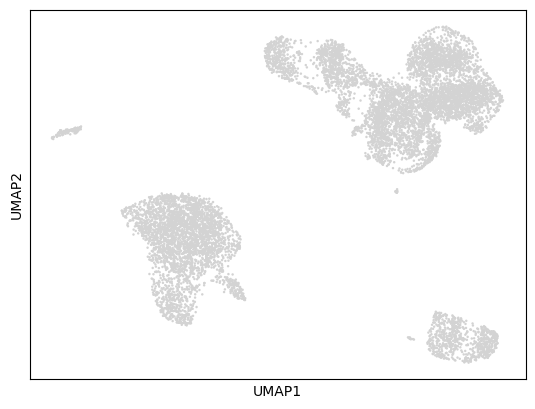

In [62]:
#可视化umap非线性降维后的结果
#sc.pl.umap(annData,color=['X_umap'])
# |
# |
# |
# |
# ——————>>>>>这个按道理是没问题的，但是我运行不出来，好像说是我电脑版本不太兼容，你们可以试试，不行就删掉他吧*_*
#######
# 不加颜色运行出来下面这个图，但是没有颜色（）
sc.pl.umap(annData)

##### t-SNE

In [63]:
#使用tsne进行降维处理，最后结果存储于annData.obsm['X_tsne']中
#sc.tl.tsne(annData,use_rep='X_pca')
# |
# |
# |
# |
# ——————>>>>>这个按道理应该也是没问题的，但是我也运行不出来，你们要是也不行的话说明是我写错了，那就删掉他吧-_-

In [64]:
##可视化tsne非线性降维后的结果
#sc.pl.tsne(annData)

In [65]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'neighbors', 'umap'
    obsm: 'scaled|X_pca', 'original|X_pca', 'X_umap'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'
    obsp: 'distances', 'connectivities'

### 聚类

不同分辨率调用Leiden算法进行聚类：

In [66]:
#注意这是在原始数据（归一化后的结果）上进行聚类的，而不是umap或者tsne降维后的数据
sc.tl.leiden(annData,key_added="leiden_0_25",resolution=0.25)
sc.tl.leiden(annData,key_added="leiden_0_5",resolution=0.5)
sc.tl.leiden(annData,key_added="leiden_1_0",resolution=1.0)
sc.tl.leiden(annData,key_added="leiden_1_5",resolution=1.5)
sc.tl.leiden(annData,key_added="leiden_2_0",resolution=2.0)

In [67]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    obs: 'leiden_0_25', 'leiden_0_5', 'leiden_1_0', 'leiden_1_5', 'leiden_2_0'
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'scaled|X_pca', 'original|X_pca', 'X_umap'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'
    obsp: 'distances', 'connectivities'

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\sca

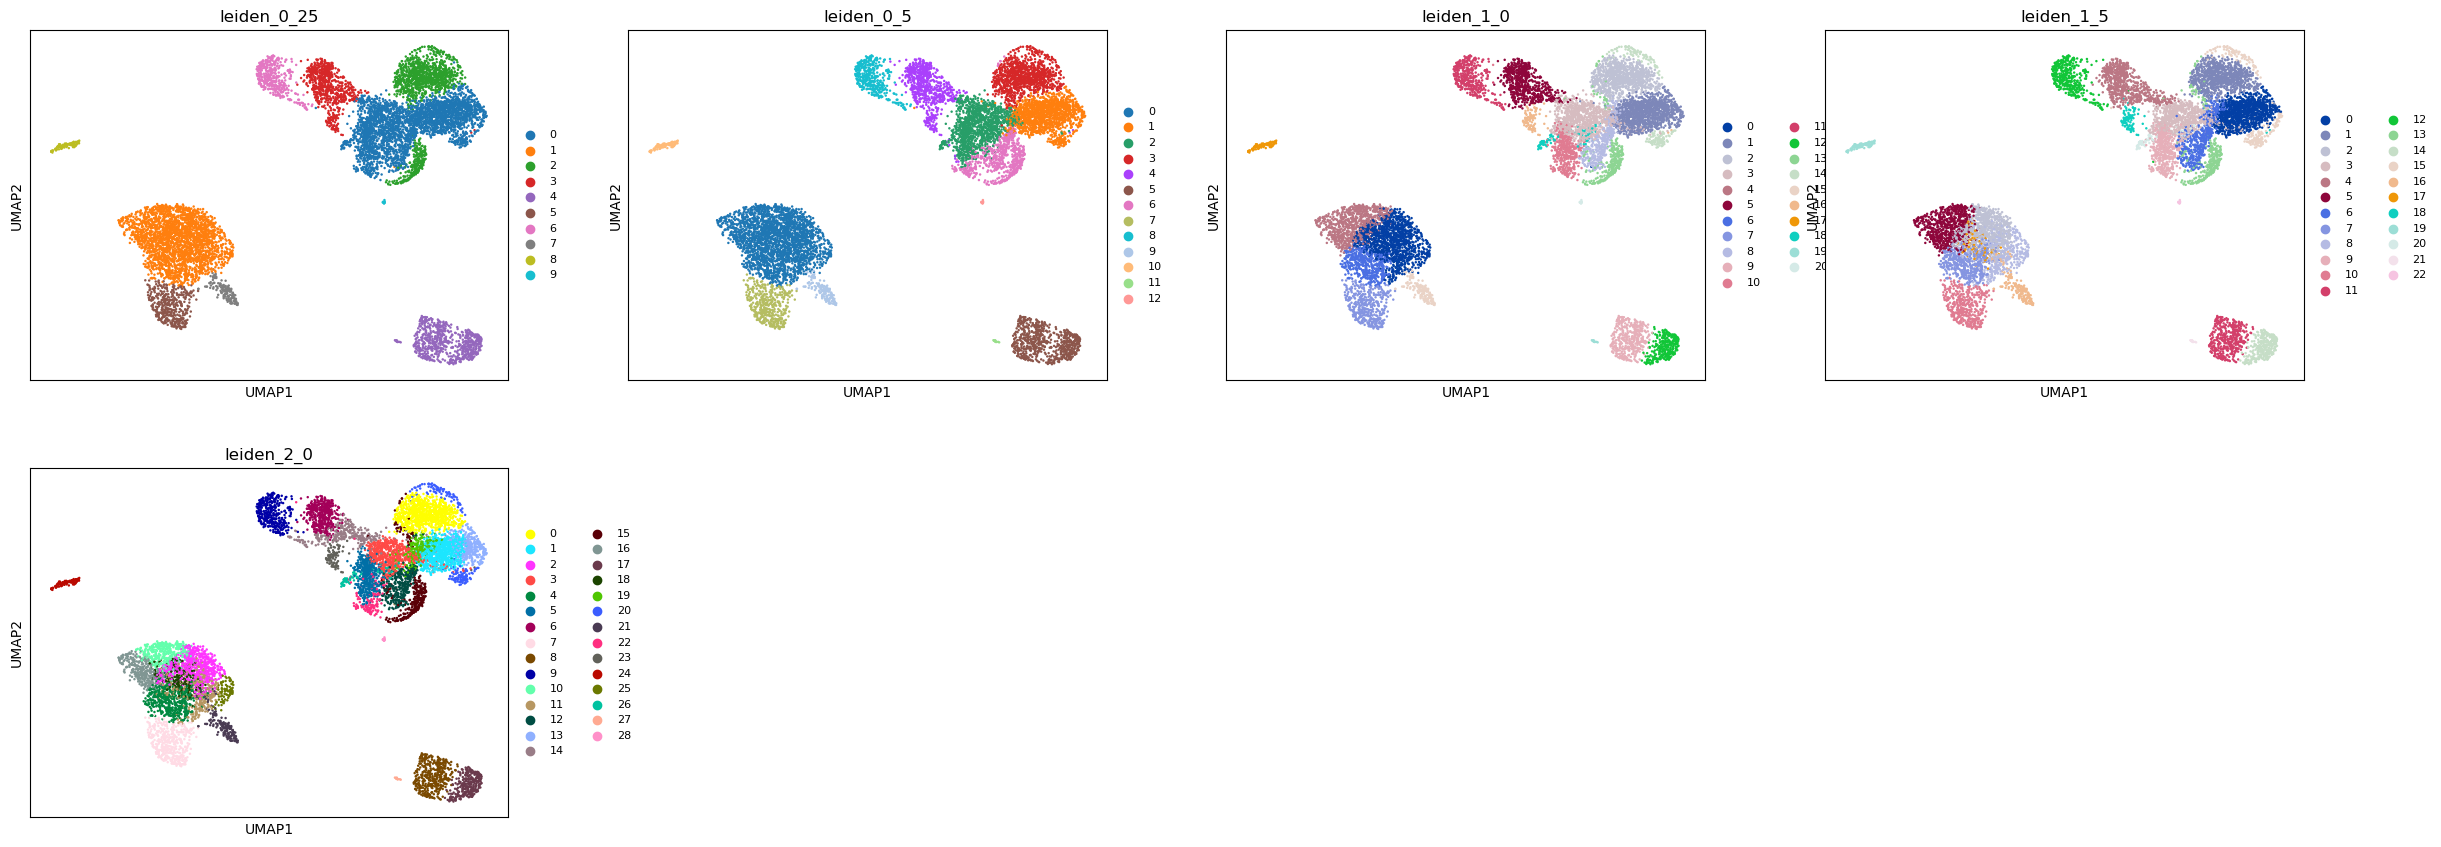

In [68]:
#每个点（即一个细胞）的颜色将根据其所属的 'leiden' 聚类结果来显示
sc.pl.umap(annData,color=["leiden_0_25",'leiden_0_5','leiden_1_0','leiden_1_5','leiden_2_0'],legend_fontsize=8)

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\sca

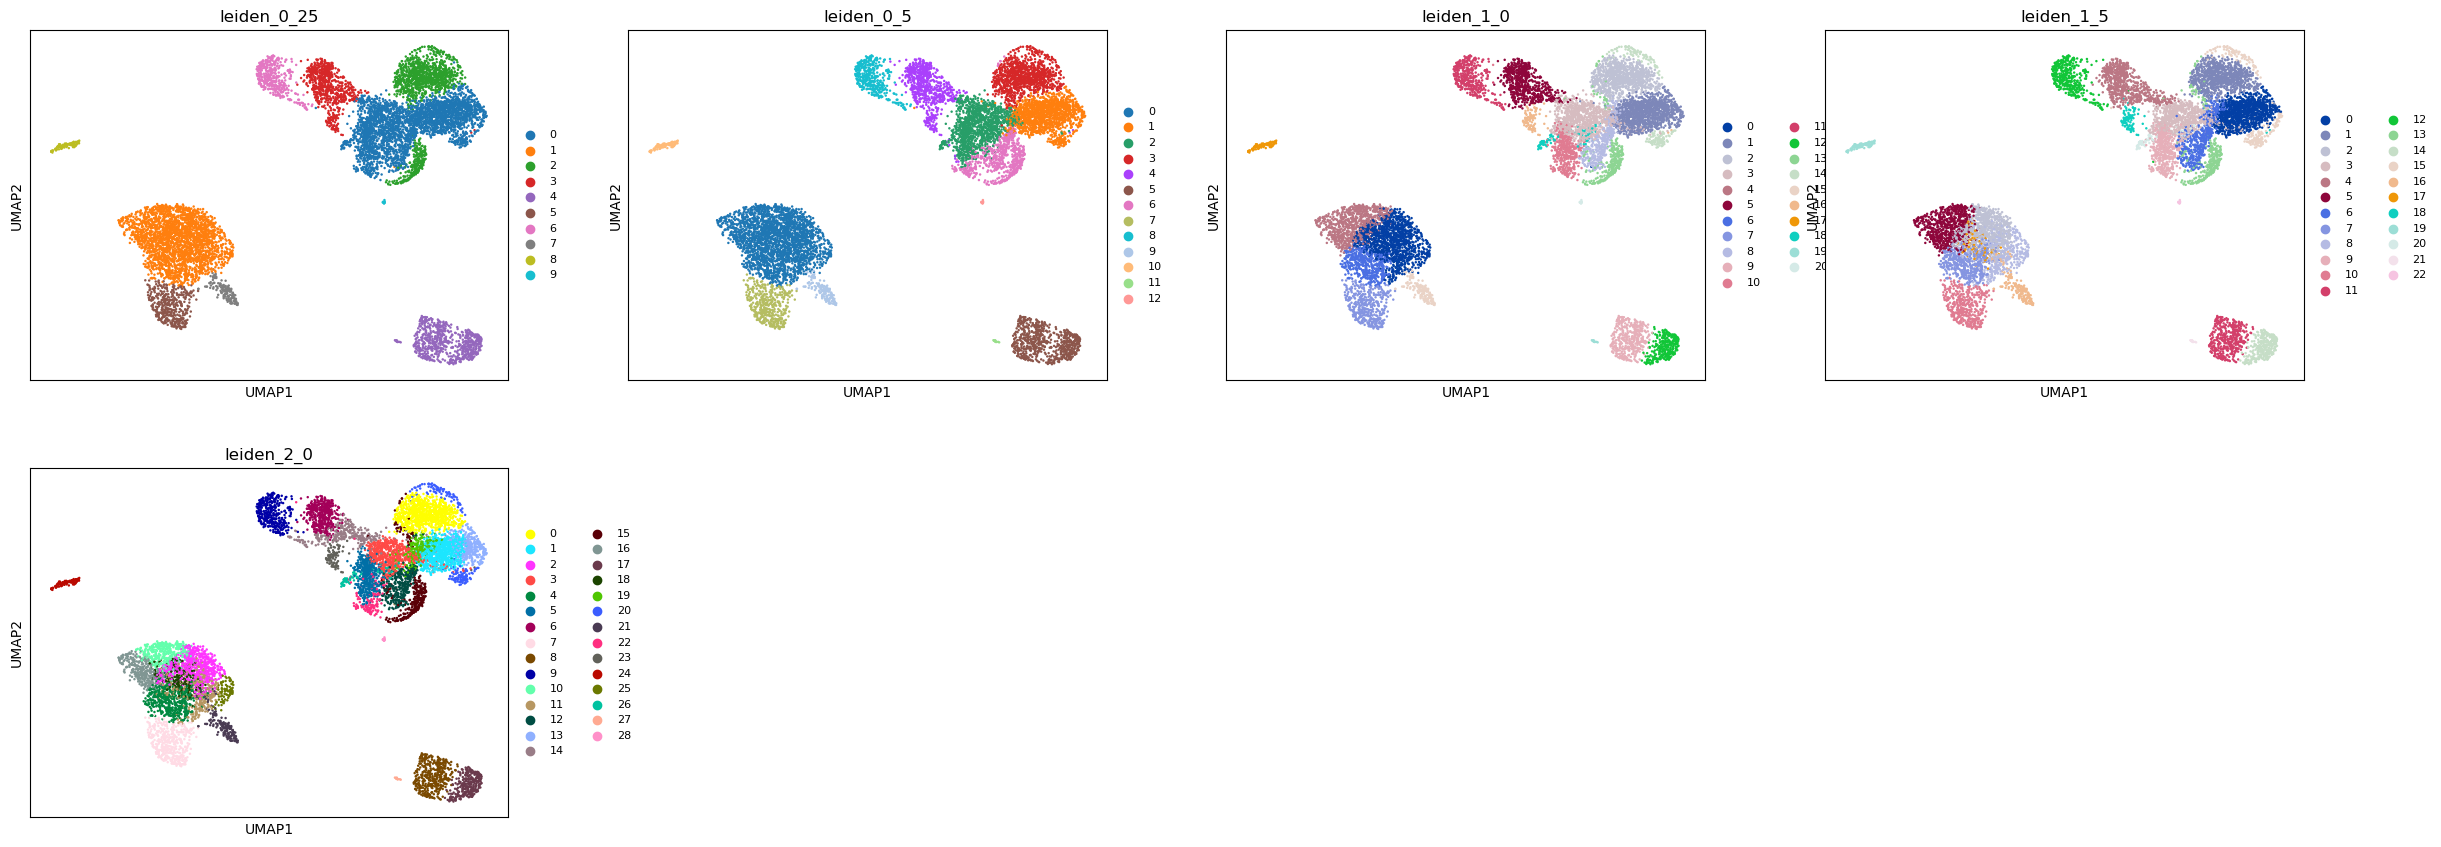

In [69]:
#use_raw=False可以绘制缩放矫正的邻域图
sc.pl.umap(annData,color=["leiden_0_25",'leiden_0_5','leiden_1_0','leiden_1_5','leiden_2_0'],legend_fontsize=8,use_raw=False)

In [72]:
#sc.pl.pca(annData,color=["leiden_0_25",'leiden_0_5','leiden_1_0','leiden_1_5','leiden_2_0'],legend_fontsize=8)
# 这个不太重要，因为我感觉没有umap直观，但是如果要运行可以把scaled|pca或者original|pca的数据复制到pca中就可以

### 定义细胞类型

为了定义每个簇属于什么细胞，首先根据基因的差异表达水平将每个簇排名前25的基因导出

e:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\t

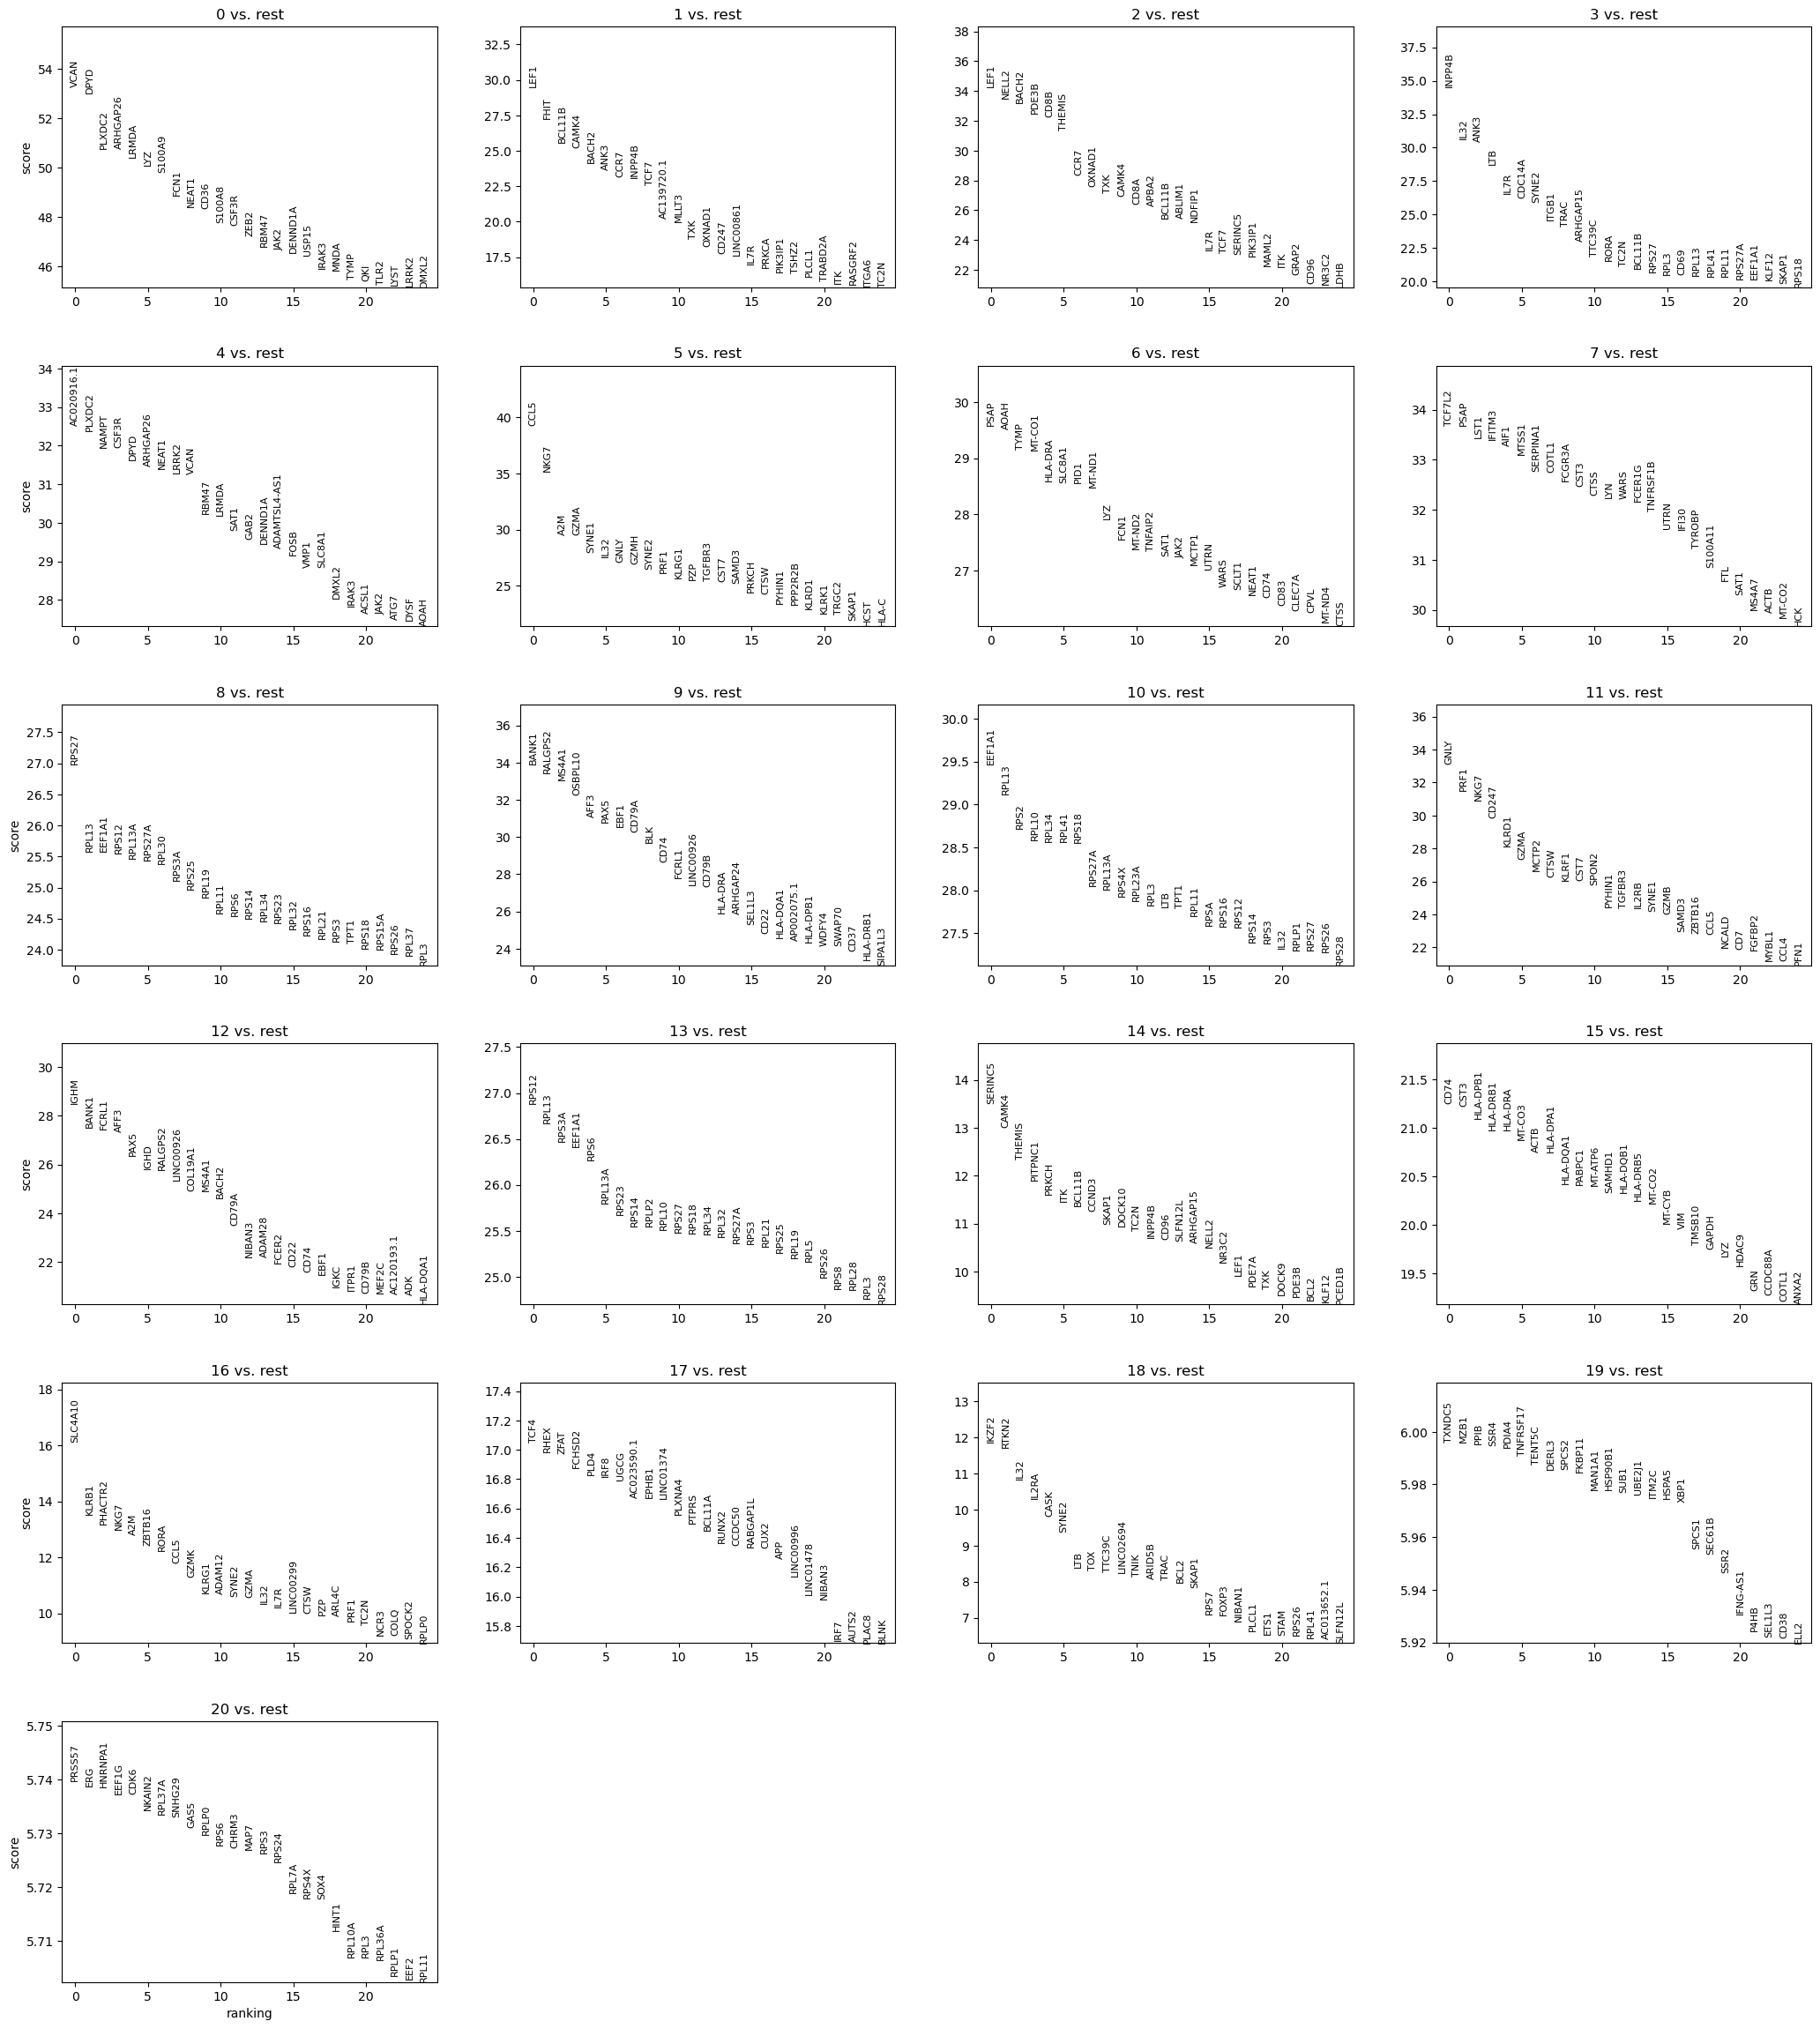

In [73]:
sc.tl.rank_genes_groups(annData,"leiden_1_0",method="wilcoxon")
#sharey=False表示每个子图的 y 轴刻度范围会根据对应的差异表达基因而自动调整
sc.pl.rank_genes_groups(annData,n_genes=25,sharey=False)

In [74]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    obs: 'leiden_0_25', 'leiden_0_5', 'leiden_1_0', 'leiden_1_5', 'leiden_2_0'
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_0_25_colors', 'leiden_0_5_colors', 'leiden_1_0_colors', 'leiden_1_5_colors', 'leiden_2_0_colors', 'rank_genes_groups'
    obsm: 'scaled|X_pca', 'original|X_pca', 'X_umap'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'
    obsp: 'distances', 'connectivities'

使用标记基因对聚类进行注释涉及将特定基因与每个聚类相关联，从而识别可能表示在这些聚类中的细胞类型或生物状态。

In [75]:
groups=annData.uns["rank_genes_groups"]
print(groups)

{'params': {'groupby': 'leiden_1_0', 'reference': 'rest', 'method': 'wilcoxon', 'use_raw': True, 'layer': None, 'corr_method': 'benjamini-hochberg'}, 'names': rec.array([('VCAN', 'LEF1', 'LEF1', 'INPP4B', 'AC020916.1', 'CCL5', 'PSAP', 'TCF7L2', 'RPS27', 'BANK1', 'EEF1A1', 'GNLY', 'IGHM', 'RPS12', 'SERINC5', 'CD74', 'SLC4A10', 'TCF4', 'IKZF2', 'TXNDC5', 'PRSS57'),
           ('DPYD', 'FHIT', 'NELL2', 'IL32', 'PLXDC2', 'NKG7', 'AOAH', 'PSAP', 'RPL13', 'RALGPS2', 'RPL13', 'PRF1', 'BANK1', 'RPL13', 'CAMK4', 'CST3', 'KLRB1', 'RHEX', 'RTKN2', 'MZB1', 'ERG'),
           ('PLXDC2', 'BCL11B', 'BACH2', 'ANK3', 'NAMPT', 'A2M', 'TYMP', 'LST1', 'EEF1A1', 'MS4A1', 'RPS2', 'NKG7', 'FCRL1', 'RPS3A', 'THEMIS', 'HLA-DPB1', 'PHACTR2', 'ZFAT', 'IL32', 'PPIB', 'HNRNPA1'),
           ...,
           ('BCL11B', 'MT-CO3', 'ZEB2', 'LYN', 'RPL13', 'SERINC5', 'RPS27', 'BCL11B', 'ZEB2', 'DPYD', 'ZEB2', 'MT-ND3', 'SAMHD1', 'LYN', 'ACTB', 'IL32', 'MAML2', 'AOAH', 'AOAH', 'PTPRC', 'PTPRJ'),
           ('RPS27', 'MT-

In [76]:
# 检查rank_genes_groups结果
print(annData.uns['rank_genes_groups'].keys())

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])


In [77]:
#加上.dtype.names后，其中包含了结构化数组中各列的字段名称
groups_result=groups['names'].dtype.names
data={}
for group in groups_result:
    for key in ['names','pvals']:
        string=f"{group}_{key}"
        data[string]=groups[key][group]
df=pd.DataFrame(data)
df.head(25)

,0_names,0_pvals,1_names,1_pvals,2_names,2_pvals,3_names,3_pvals,4_names,4_pvals,...,16_names,16_pvals,17_names,17_pvals,18_names,18_pvals,19_names,19_pvals,20_names,20_pvals
0,VCAN,0.0,LEF1,1.501709e-191,LEF1,1.329225e-257,INPP4B,1.393479e-261,AC020916.1,5.828127e-232,...,SLC4A10,2.422597e-58,TCF4,3.539622e-65,IKZF2,1.982584e-32,TXNDC5,2.022997e-09,PRSS57,9.488542e-09
1,DPYD,0.0,FHIT,9.621124e-164,NELL2,2.769319e-246,IL32,4.389538e-206,PLXDC2,5.522997e-230,...,KLRB1,1.234517e-41,RHEX,1.077301e-64,RTKN2,1.062998e-31,MZB1,2.022997e-09,ERG,9.540351e-09
2,PLXDC2,0.0,BCL11B,3.097525e-144,BACH2,9.720840e-242,ANK3,1.376135e-203,NAMPT,5.023480e-224,...,PHACTR2,1.199428e-39,ZFAT,1.290716e-64,IL32,2.237761e-27,PPIB,2.031422e-09,HNRNPA1,9.546464e-09
3,ARHGAP26,0.0,CAMK4,1.797146e-140,PDE3B,2.326916e-231,LTB,3.211066e-181,CSF3R,5.191876e-224,...,NKG7,1.477857e-38,FCHSD2,6.482236e-64,IL2RA,7.125785e-25,SSR4,2.041185e-09,EEF1G,9.626284e-09
4,LRMDA,0.0,BACH2,1.586846e-128,CD8B,2.542405e-228,IL7R,8.774714e-156,DPYD,1.469561e-219,...,A2M,1.455262e-37,PLD4,1.509337e-63,CASK,1.026370e-22,PDIA4,2.045757e-09,CDK6,9.626284e-09
5,LYZ,0.0,ANK3,1.842092e-123,THEMIS,3.292964e-216,CDC14A,1.158306e-151,ARHGAP26,2.331024e-217,...,ZBTB16,2.299066e-35,IRF8,1.941535e-63,SYNE2,8.154289e-21,TNFRSF17,2.086023e-09,NKAIN2,9.791007e-09
6,S100A9,0.0,CCR7,2.175190e-118,CCR7,1.410264e-176,SYNE2,8.180843e-148,NEAT1,2.284256e-216,...,RORA,2.103922e-34,UGCG,2.876633e-63,LTB,4.443173e-17,TENT5C,2.130458e-09,RPL37A,9.838122e-09
7,FCN1,0.0,INPP4B,9.611563e-118,OXNAD1,1.053599e-167,ITGB1,2.119758e-133,LRRK2,8.514940e-215,...,CCL5,3.880415e-32,AC023590.1,2.044140e-62,TOX,9.989485e-17,DERL3,2.157836e-09,SNHG29,9.863340e-09
8,NEAT1,0.0,TCF7,1.082392e-112,TXK,8.054113e-163,TRAC,1.714638e-128,VCAN,1.535194e-214,...,GZMK,1.626156e-29,EPHB1,2.093437e-62,TTC39C,1.468963e-16,SPCS2,2.157836e-09,GAS5,9.983987e-09
9,CD36,0.0,AC139720.1,3.296256e-91,CAMK4,6.349261e-160,ARHGAP15,2.568716e-117,RBM47,1.103532e-200,...,KLRG1,9.766472e-27,LINC01374,2.457511e-62,LINC02694,1.627398e-16,FKBP11,2.170267e-09,RPLP0,1.006414e-08


解释如下：

每一行代表一个基因，每两列代表一个细胞群组，分别代表该基因在该细胞群组下表达的基因名称和p值（差异表达的置信度水平）

In [78]:
print("总共%n个基因\n",df.shape[0])

总共%n个基因
 25523


浏览每一个聚类的细胞个数

In [79]:
for i in annData.obs['leiden_1_0'].cat.categories:
  number = len(annData.obs[annData.obs['leiden_1_0']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 1295
the number of category 1 is 1193
the number of category 2 is 964
the number of category 3 is 883
the number of category 4 is 797
the number of category 5 is 663
the number of category 6 is 495
the number of category 7 is 428
the number of category 8 is 415
the number of category 9 is 414
the number of category 10 is 409
the number of category 11 is 408
the number of category 12 is 308
the number of category 13 is 303
the number of category 14 is 177
the number of category 15 is 161
the number of category 16 is 104
the number of category 17 is 98
the number of category 18 is 93
the number of category 19 is 12
the number of category 20 is 11


In [80]:
#删除一些类中细胞个数比较少的类别
#annData = annData[annData.obs[annData.obs['leiden_1_0'].astype(int)<18].index]

In [81]:
annData

AnnData object with n_obs × n_vars = 9631 × 2000
    obs: 'leiden_0_25', 'leiden_0_5', 'leiden_1_0', 'leiden_1_5', 'leiden_2_0'
    var: 'n_cells', 'highly_variable_var', 'highly_variable_pearson'
    uns: 'neighbors', 'umap', 'leiden', 'leiden_0_25_colors', 'leiden_0_5_colors', 'leiden_1_0_colors', 'leiden_1_5_colors', 'leiden_2_0_colors', 'rank_genes_groups'
    obsm: 'scaled|X_pca', 'original|X_pca', 'X_umap'
    layers: 'counts', 'log1p_norm', 'analytic_pearson_residuals', 'scaled'
    obsp: 'distances', 'connectivities'

In [82]:
for i in annData.obs['leiden_1_0'].cat.categories:
  number = len(annData.obs[annData.obs['leiden_1_0']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 1295
the number of category 1 is 1193
the number of category 2 is 964
the number of category 3 is 883
the number of category 4 is 797
the number of category 5 is 663
the number of category 6 is 495
the number of category 7 is 428
the number of category 8 is 415
the number of category 9 is 414
the number of category 10 is 409
the number of category 11 is 408
the number of category 12 is 308
the number of category 13 is 303
the number of category 14 is 177
the number of category 15 is 161
the number of category 16 is 104
the number of category 17 is 98
the number of category 18 is 93
the number of category 19 is 12
the number of category 20 is 11


In [83]:
print(annData.obs['leiden_1_0'].keys())

Index(['AAACAGCCAATCCCTT-1', 'AAACAGCCAATGCGCT-1', 'AAACAGCCACCAACCG-1',
       'AAACAGCCAGGATAAC-1', 'AAACAGCCAGTTTACG-1', 'AAACAGCCATCCAGGT-1',
       'AAACATGCAAGGTCCT-1', 'AAACATGCACCGGCTA-1', 'AAACATGCACTTGTTC-1',
       'AAACATGCAGCAAGTG-1',
       ...
       'TTTGTGTTCGATAACC-1', 'TTTGTGTTCGGGACCT-1', 'TTTGTGTTCGTCAAGT-1',
       'TTTGTGTTCTCCATAT-1', 'TTTGTTGGTCAGGAAG-1', 'TTTGTTGGTGACATGC-1',
       'TTTGTTGGTGTTAAAC-1', 'TTTGTTGGTTAGGATT-1', 'TTTGTTGGTTGGTTAG-1',
       'TTTGTTGGTTTGCAGA-1'],
      dtype='object', name='cells', length=9631)


e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


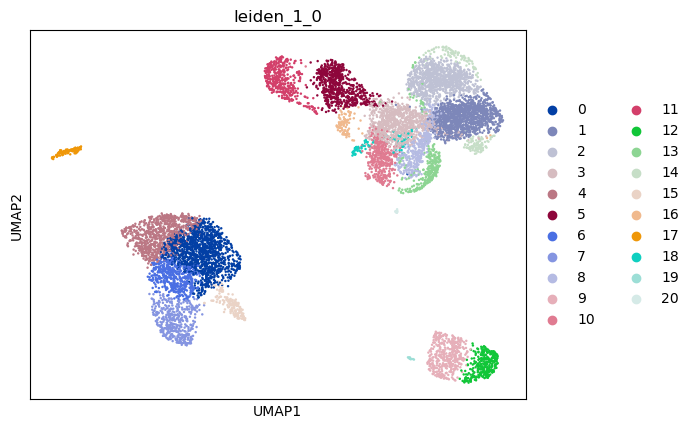

In [84]:
sc.pl.umap(annData, color=['leiden_1_0'])

存储数据至result.csv中

In [86]:
with open("result.csv","w") as file:
    for i in range(len(annData.obs)):
        category_values=annData.obs.iloc[i]['leiden_1_0']
        file.write(category_values+"\n")